# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Learning Objective

The objective of this experiment is to understand Linear classifier.

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 60 records. Each record represents the following details of fruits : 

* **Weight -**  It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* **Sphericity -** is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

* **Color -** Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Orange as 22
     - Greenish Yellow as 23
     - Green as 24
     - Red as 25
     - Reddish Yellow as 26

* **Label -**  We have considered two fruits for simplicity. They are Apple and Orange.




## Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U1W3_08_LC_Fruits_data" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fruits_weight_sphercity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


#### Importing Required Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

#### Loading the data

In [ ]:
def labels_converter(s):
  s = s.lower()
  if s == "orange":
    return 0
  if s == "apple":
    return 1
  return -1

### In the color_converter method below we assign each category to a number. But which number? We have a choice of defining. Can you try out suggested numbers in the comments below?

In [ ]:
def color_converter(s):
  s = s.lower()
  if s == 'green':
    return 20 #Could you try 25,26,27,28,29 instead of 20,40,60,80,100? Is it causing a dip in accuracy? Could you reason why?
  if s == 'greenish yellow':
    return 40
  if s == 'orange':
    return 60
  if s == 'red':
    return 80
  if s == 'reddish yellow':
    return 100
  return -1

In [ ]:
import pandas as pd
fruits_data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter,"Color":color_converter})

**To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()**

In [ ]:
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


In [ ]:
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,1
65,80,200,0.49,1
66,80,200,0.42,1
67,80,201,0.40,1
68,80,202,0.40,1


### There are a few noisy samples in the data which is skew the accuracies. So here is the code to drop them. However before un-commenting the code below, go through the experiment and visualize those noisy samples and then re-run the experiment after un-commenting the lines below.

In [ ]:
# fruits_data = fruits_data.drop(fruits_data[(fruits_data['labels'] == 1) & (fruits_data['Weight'] > 325)].index)
# To understand the above code properly look at the plot and also try to drop the noisy data of class 0.

### Storing data and labels in two seperate variables


In [ ]:
data = fruits_data[["Weight","Color","Sphericity"]] 

In [ ]:
labels = fruits_data["labels"]

In [ ]:
data

,Weight,Color,Sphericity
0,200,80,0.40
1,320,60,1.00
2,310,60,0.95
3,220,80,0.45
4,230,80,0.50
...,...,...,...
64,200,80,0.43
65,200,80,0.49
66,200,80,0.42
67,201,80,0.40


### Let us plot 2 parameters (out of the three) for visualization. (If you're interested in plotting in 3-D, which might be of help here, you can explore Matplotlib's Axes3D [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html))

In [ ]:
apples=fruits_data[fruits_data['labels']== 1] #apples are 1
oranges=fruits_data[fruits_data['labels']== 0] #oranges are 0 as defined about in the converter method

In [ ]:
fruits_data['labels']

0     1
1     0
2     0
3     1
4     1
     ..
64    1
65    1
66    1
67    1
68    1
Name: labels, Length: 69, dtype: int64

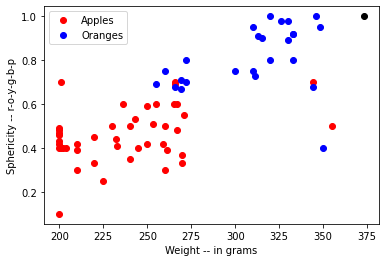

In [ ]:
plt.plot(apples.Weight, apples.Sphericity, "ro")
plt.plot(oranges.Weight, oranges.Sphericity, "bo")
plt.xlabel("Weight -- in grams")
plt.ylabel("Sphericity -- r-o-y-g-b-p")
plt.legend(["Apples", "Oranges"])
plt.plot([373], [1], "ko")
plt.show()

In [ ]:
data

,Weight,Color,Sphericity
0,200,80,0.40
1,320,60,1.00
2,310,60,0.95
3,220,80,0.45
4,230,80,0.50
...,...,...,...
64,200,80,0.43
65,200,80,0.49
66,200,80,0.42
67,201,80,0.40


In [ ]:
type(data)

pandas.core.frame.DataFrame

### Splitting the data into train and test sets (The 'stratify' parameter below ensures that labels are equally distributed in both train and test. You can try that out here and see if you're seeing any pattern in accuracies with and without over multiple runs)

**random_state**, as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. The number 42 can be replaced with any number.

Reference: https://www.kaggle.com/questions-and-answers/49890

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.33,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.33,stratify=labels,random_state=42)

In [ ]:
data.shape

(69, 3)

In [ ]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape

((46, 3), (23, 3))

In [ ]:
# Let us see first five rows of the training data
X_train[:5]

,Weight,Color,Sphericity
28,330,20,0.89
7,330,40,0.98
61,344,20,0.68
40,204,80,0.40
50,272,60,0.80


### Training a  Linear Classifier 

In [ ]:
linear_classifier = linear_model.SGDClassifier()

In [ ]:
# Training or fitting the model with the train data
linear_classifier.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Testing the trained model
linear_classifier.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1])

In [ ]:
# Calculating the score
linear_classifier.score(X_test,y_test)

0.8260869565217391

### Not happy with the accuracies? How about trying to see which exact samples caused the accuracies to drop? (Especially given that this is a small dataset which can be doable. This sort of analysis is infeasible on large-datasets)

In [ ]:
print(X_test)
print(y_test)

    Weight  Color  Sphericity
22     326     20        0.98
0      200     80        0.40
47     225     80        0.25
4      230     80        0.50
53     333     40        0.92
18     266     20        0.68
10     333     40        0.92
33     271     20        0.55
44     346     60        1.00
12     259     20        0.42
31     255     20        0.69
9      243     80        0.53
59     310     40        0.75
5      245     80        0.40
68     202     80        0.40
30     269     20        0.67
57     201    100        0.70
35     250     20        0.59
56     200     80        0.10
46     210     80        0.30
16     267    100        0.48
34     269     20        0.71
42     210     80        0.42
22    0
0     1
47    1
4     1
53    0
18    0
10    0
33    1
44    0
12    1
31    0
9     1
59    0
5     1
68    1
30    0
57    1
35    1
56    1
46    1
16    1
34    0
42    1
Name: labels, dtype: int64


### Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good practice " #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2854
Date of submission:  12 Sep 2020
Time of submission:  14:33:44
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
